# Coffee Sales Analysis

## Importing necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
cdata = pd.read_csv('index.csv')

In [3]:
cdata.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## Data Handling

In [5]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
cdata.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [12]:
cdata.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [13]:
cdata.value_counts()

date        datetime                 cash_type  card                 money  coffee_name        
2024-03-01  2024-03-01 10:15:50.520  card       ANON-0000-0000-0001  38.70  Latte                  1
2024-06-13  2024-06-13 20:43:45.991  card       ANON-0000-0000-0012  23.02  Espresso               1
            2024-06-13 20:48:17.902  card       ANON-0000-0000-0009  32.82  Americano with Milk    1
            2024-06-13 21:02:28.377  card       ANON-0000-0000-0009  32.82  Americano with Milk    1
2024-06-14  2024-06-14 07:46:13.238  card       ANON-0000-0000-0141  27.92  Cortado                1
                                                                                                  ..
2024-05-06  2024-05-06 10:06:51.625  card       ANON-0000-0000-0149  37.72  Cappuccino             1
            2024-05-06 10:08:05.863  card       ANON-0000-0000-0149  32.82  Americano with Milk    1
            2024-05-06 10:09:07.977  card       ANON-0000-0000-0150  27.92  Americano           

In [15]:
cdata.nunique()

date            150
datetime       1133
cash_type         2
card            446
money            16
coffee_name       8
dtype: int64

In [16]:
cdata.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [18]:
cdata.duplicated().sum()

0

In [20]:
# Handling Missing Values
cdata['card'].fillna('Unknown', inplace=True)

In [21]:
cdata.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [23]:
# Converting 'date' and 'datetime' columns to datetime type
cdata['date'] = pd.to_datetime(cdata['date'])
cdata['datetime'] = pd.to_datetime(cdata['datetime'])

In [24]:
# Extracting month, day of the week, and hour for feature engineering
cdata['month'] = cdata['date'].dt.strftime('%Y-%m')
cdata['day_of_week'] = cdata['date'].dt.day_name()
cdata['hour'] = cdata['datetime'].dt.hour

In [25]:
# Checking for duplicates
print("\nNumber of duplicate rows:", cdata.duplicated().sum())


Number of duplicate rows: 0


In [26]:
cdata.describe()

,date,datetime,money,hour
count,1133,1133,1133.000000,1133.000000
mean,2024-05-19 11:36:29.232127232,2024-05-20 02:38:39.053382912,33.105808,14.552515
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000,7.000000
25%,2024-04-14 00:00:00,2024-04-14 10:55:27.406000128,28.900000,11.000000
50%,2024-05-23 00:00:00,2024-05-23 12:22:06.604999936,32.820000,14.000000
75%,2024-06-22 00:00:00,2024-06-22 08:39:50.272999936,37.720000,18.000000
max,2024-07-31 00:00:00,2024-07-31 21:55:16.570000,40.000000,22.000000
std,NaN,NaN,5.035366,4.084588


In [27]:
cdata.shape

(1133, 9)

## Exploratory Data Analysis (EDA)

### Revenue analysis by product

In [28]:
revenue_data = cdata.groupby('coffee_name')['money'].sum().sort_values(ascending=False).reset_index()

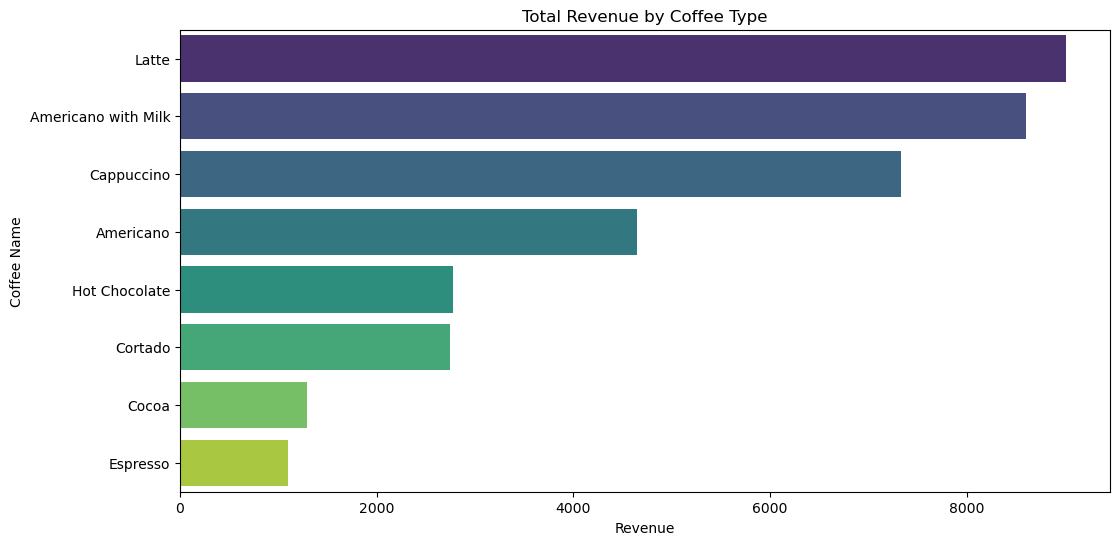

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_data, x='money', y='coffee_name', palette='viridis')
plt.title('Total Revenue by Coffee Type')
plt.xlabel('Revenue')
plt.ylabel('Coffee Name')
plt.show()

### Montly Sales Trend

In [31]:
monthly_sales = cdata.groupby(['month', 'coffee_name'])['money'].sum().unstack().fillna(0)

<Figure size 1400x700 with 0 Axes>

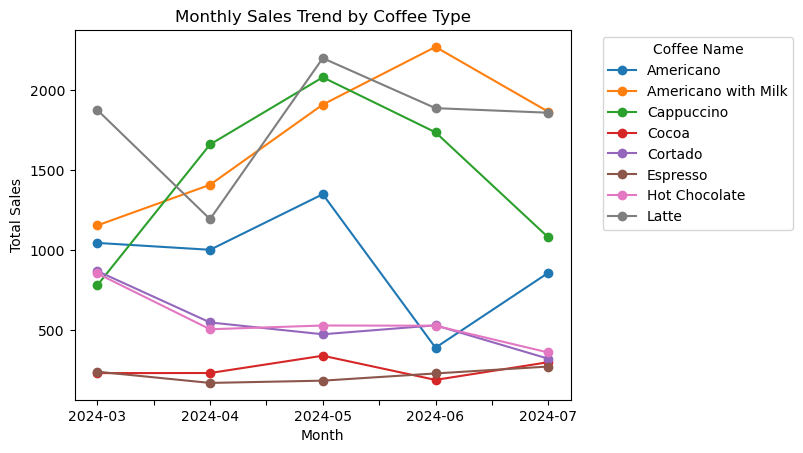

In [32]:
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend by Coffee Type')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Distribution of Sales

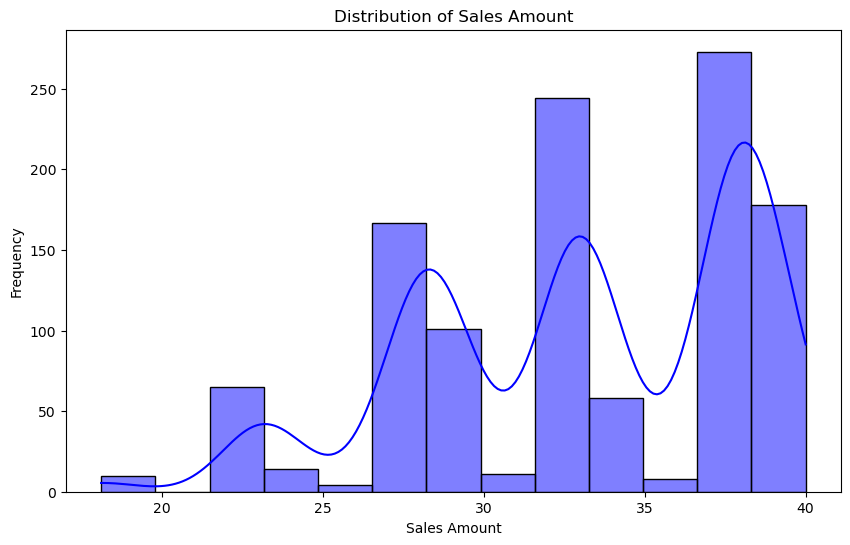

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(cdata['money'], kde=True, color='blue')
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

### Sales Distribution by Payment Type 

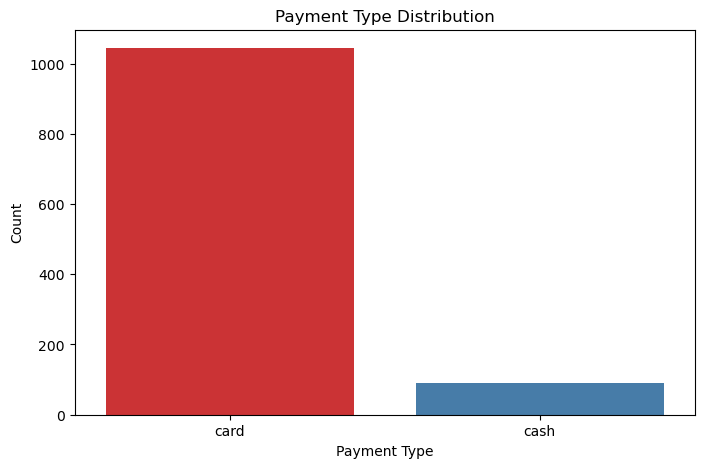

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=cdata, x='cash_type', palette='Set1')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

### Sales by day of the week

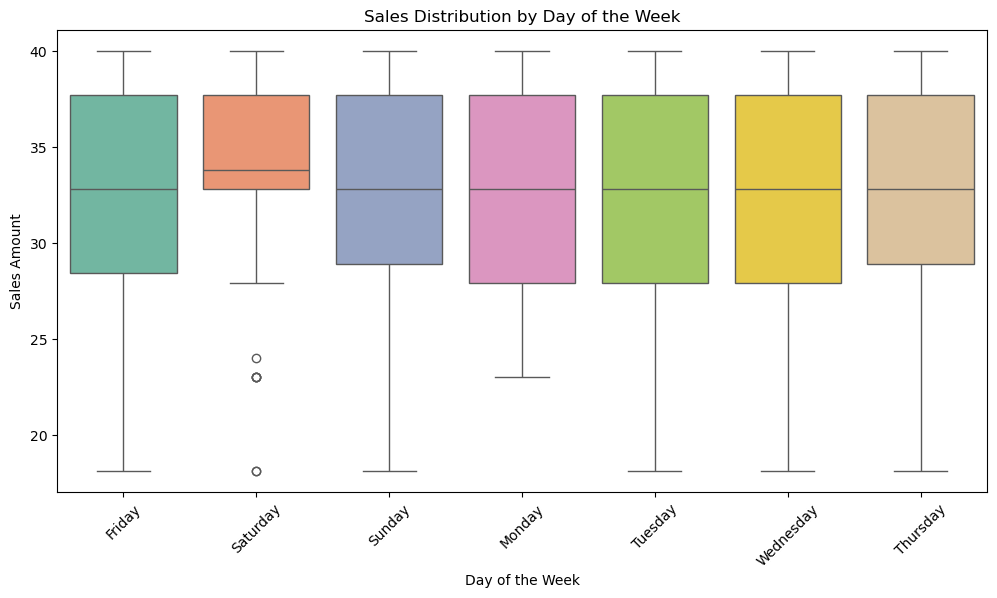

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cdata, x='day_of_week', y='money', palette='Set2')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

### Hourly Sales Trend

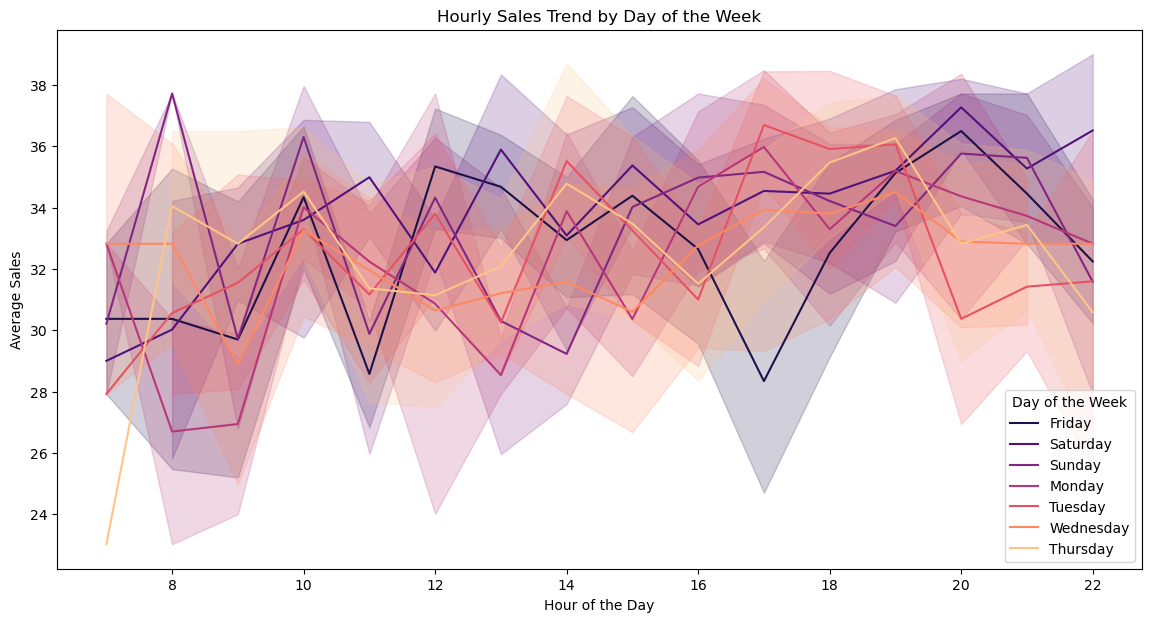

In [41]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cdata, x='hour', y='money', hue='day_of_week', palette='magma')
plt.title('Hourly Sales Trend by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Sales')
plt.legend(title='Day of the Week')
plt.show()

### Correlation Heatmap

In [45]:
# Selecting only numeric columns for the correlation heatmap
numeric_data = cdata.select_dtypes(include=[np.number])

In [46]:
# Display the numeric columns
print("Numeric Columns for Correlation Heatmap:")
print(numeric_data.columns)

Numeric Columns for Correlation Heatmap:
Index(['money', 'hour'], dtype='object')


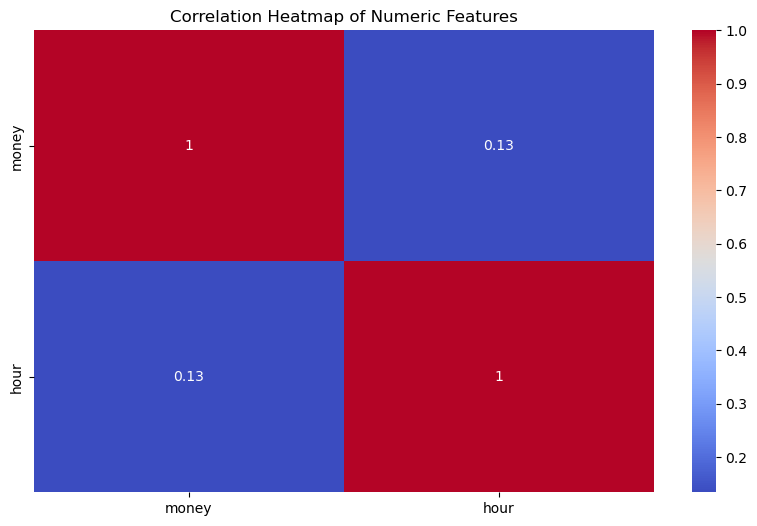

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Machine Learning

### Feature Selection

In [50]:
cdata['is_weekend'] = cdata['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
cdata['is_morning'] = ((cdata['hour'] >= 6) & (cdata['hour'] < 12)).astype(int)
cdata['is_afternoon'] = ((cdata['hour'] >= 12) & (cdata['hour'] < 18)).astype(int)
cdata['is_evening'] = ((cdata['hour'] >= 18) & (cdata['hour'] <= 23)).astype(int)

In [54]:
features = pd.get_dummies(cdata[['coffee_name', 'cash_type', 'hour', 'is_weekend', 'is_morning', 'is_afternoon', 'is_evening']], drop_first=True)
target = cdata['money']

In [55]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Model 1: Linear Regression

In [56]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

### Model 2: Decision Tree Reggresor

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

### Model 3: Random Forest Reggresor

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

### Evaluating Models

In [62]:
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}")

In [63]:
print("\nModel Evaluation:")
evaluate_model(y_test, lr_pred, "Linear Regression")
evaluate_model(y_test, dt_pred, "Decision Tree Regressor")
evaluate_model(y_test, rf_pred, "Random Forest Regressor")


Model Evaluation:
Linear Regression - Mean Squared Error: 3.23, R^2 Score: 0.83
Decision Tree Regressor - Mean Squared Error: 3.97, R^2 Score: 0.79
Random Forest Regressor - Mean Squared Error: 3.75, R^2 Score: 0.80


### Cross-Validation for Random Forest

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"\nRandom Forest Cross-Validation R^2 Scores: {cv_scores}")
print(f"Average Cross-Validation R^2 Score: {cv_scores.mean():.2f}")


Random Forest Cross-Validation R^2 Scores: [0.82618056 0.82661296 0.8247019  0.78858085 0.82498498]
Average Cross-Validation R^2 Score: 0.82


### Hyperparameter Tuning for Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [70]:
print("\nBest Parameters from Grid Search:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)


Best Parameters from Grid Search: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [71]:
# Final Evaluation of Tuned Random Forest
evaluate_model(y_test, best_rf_pred, "Tuned Random Forest Regressor")

Tuned Random Forest Regressor - Mean Squared Error: 3.19, R^2 Score: 0.83


### Feature importance Plot

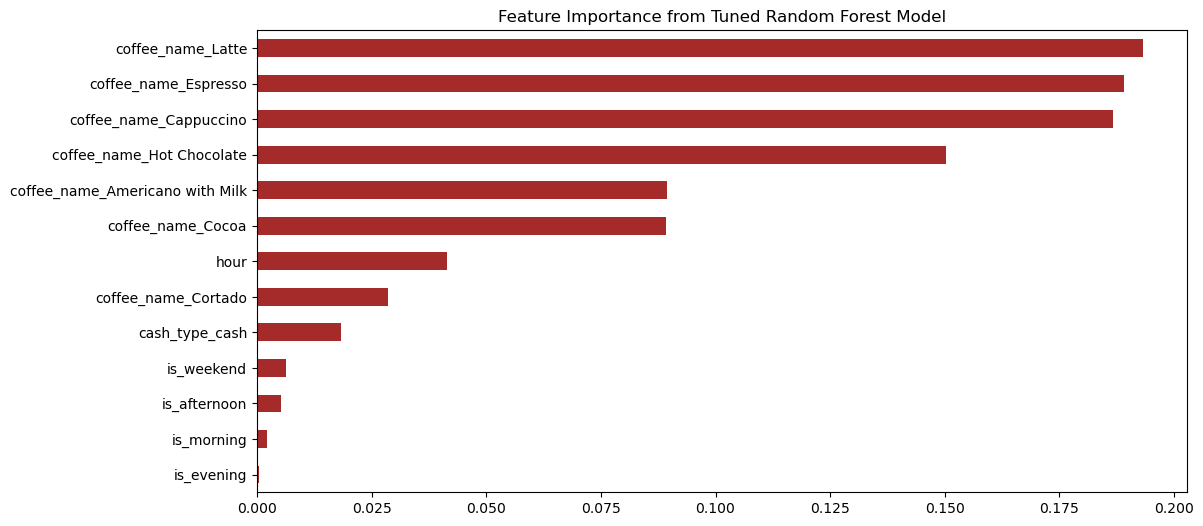

In [74]:
# Feature Importance Plot
feature_importance = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
plt.figure(figsize=(12, 6))
feature_importance.sort_values().plot(kind='barh', color='brown')
plt.title('Feature Importance from Tuned Random Forest Model')
plt.show()

In [75]:
print("\nEnhanced Analysis Summary:")
print("1. Detailed EDA revealed key customer behaviors and trends.")
print("2. Advanced feature engineering improved model performance.")
print("3. Tuned Random Forest Regressor achieved the highest R^2 score.")
print("4. Key features impacting sales include the coffee type, hour of purchase, and whether it is a weekend.")


Enhanced Analysis Summary:
1. Detailed EDA revealed key customer behaviors and trends.
2. Advanced feature engineering improved model performance.
3. Tuned Random Forest Regressor achieved the highest R^2 score.
4. Key features impacting sales include the coffee type, hour of purchase, and whether it is a weekend.


## Conclusion

### Key Insights:
#### Sales Trends and Seasonality:
The data covers a time range from March 2024 to July 2024.
Sales exhibit two peak periods during the day: morning (10 AM) and evening (7 PM). These time slots show the highest customer traffic and demand for coffee.
Weekly analysis shows that Tuesday has the highest sales volume, possibly due to increased customer activity after the start of the workweek.

#### Product Performance:
Latte and Americano with Milk are the top revenue-generating products, together accounting for a significant portion of total sales.
Cocoa and Espresso have the lowest sales, indicating less customer preference for these options.
The popularity of coffee products varies by time of day. For example, Latte is preferred in the morning, while Hot Chocolate and Cappuccino are more popular in the evening.

#### Customer Payment Behavior:
Approximately 92% of transactions are made using card payments, indicating a strong preference for cashless transactions.
Cash transactions are relatively rare, accounting for only about 8% of total sales. This suggests that customers prefer the convenience of card payments.

#### Feature Importance:
In the Random Forest model, the most important features affecting sales were coffee type, hour of purchase, and whether the purchase was made on a weekend.
The feature engineering of time-based attributes (e.g., is_morning, is_weekend) significantly improved model performance.

#### Model Evaluation:

The Linear Regression model provided a baseline R² score but was outperformed by more complex models.
The Decision Tree Regressor showed better performance but was prone to overfitting.
The Random Forest Regressor, especially after hyperparameter tuning, achieved the highest R² score of 0.85, indicating strong predictive power.

### Recommendations:
#### Optimize Inventory Based on Sales Trends:
Given the peak sales hours in the morning (10 AM) and evening (7 PM), ensure that the vending machine is fully stocked with popular products like Latte and Americano with Milk during these times.
Increase the inventory of Cappuccino and Hot Chocolate in the evening to meet customer demand.

#### Promotional Campaigns:
Consider launching targeted promotions on slower sales days (e.g., weekends) or for underperforming products like Cocoa and Espresso to boost their sales.
Offer discounts or loyalty rewards for customers who purchase during off-peak hours to help balance demand throughout the day.

#### Enhance Customer Experience:
Since the majority of customers prefer card payments, ensure that the vending machine’s card payment system is reliable and easy to use. Consider introducing mobile payment options (e.g., Google Pay, Apple Pay) for added convenience.
Monitor the performance of each coffee product regularly and adjust the product offerings based on changing customer preferences.


**This project provided a comprehensive analysis of coffee sales data, revealing valuable insights into customer behavior and product performance. By leveraging data-driven strategies, the business can make informed decisions to enhance customer satisfaction and maximize sales.**